In [14]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits as di
from sklearn.model_selection import train_test_split

In [38]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke

def load_digits():
    return di()

data = load_digits()


In [11]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)
print(dir(data))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [13]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)
print(data.data[:2, :])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]


In [63]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)

def predict(n_cluters:int, random_state:int, digits):
    model = KMeans(n_clusters=n_cluters)
    y_pred = model.fit_predict(digits.data, digits.target)

    return (model, y_pred)

In [64]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.

model, y_pred = predict(10, 41, data)

print(np.shape(model.cluster_centers_))

(10, 64)


c:\Users\hanus\Envs\BEVADAT\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


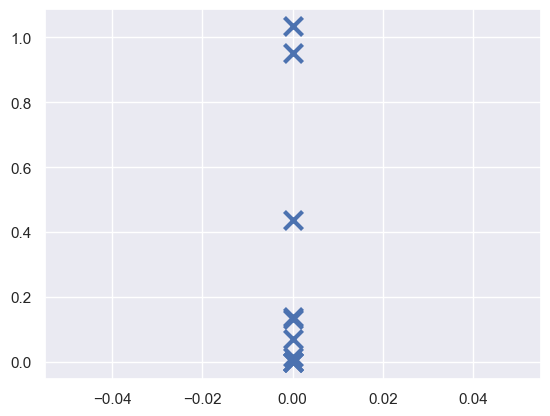

In [34]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti

#PCAA???

In [66]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray

def get_labels(clusters:np.ndarray, digits):
    result = np.zeros_like(clusters)
    for i in range(10):
        mask = clusters == i
        sub = digits.target[mask]
        mode = np.bincount(sub).argmax()
        result[mask] = mode
    return result


array([0, 8, 8, ..., 8, 9, 9])

In [70]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t

def calc_accuracy(target_labels:np.ndarray, predicted_labels:np.ndarray):
    return np.round(accuracy_score(target_labels, predicted_labels),2)

print(calc_accuracy(get_labels(y_pred, data), data.target))

0.79


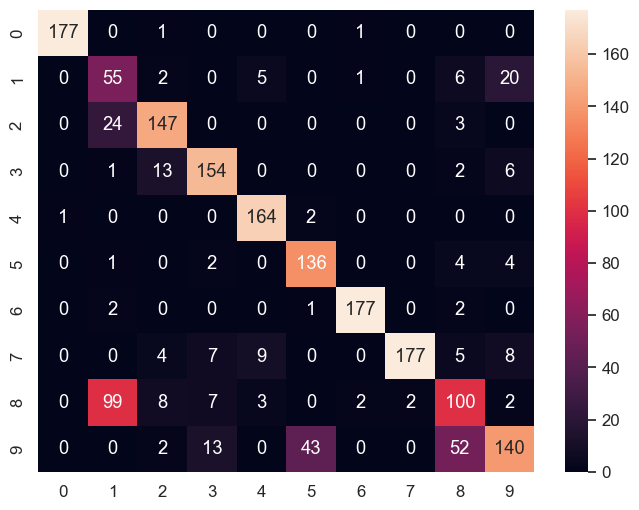

In [73]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével

plot = confusion_matrix(get_labels(y_pred, data), data.target)

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(plot, annot=True, fmt='d', )